In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

plt.style.use('ggplot')

%matplotlib inline

## Loading and cleaning data

In [2]:
from os import getcwd

data_path = getcwd() + "/data/Auto.csv"
df = pd.read_csv(data_path)

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [5]:
#  3   horsepower    397 non-null    object 
# the horspower column is not numerical

In [6]:
np.sort(df.horsepower.unique())

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

In [7]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [8]:
# remove entries with the unknown horsepower value '?' 
df = df[df['horsepower']!= '?']
df['horsepower'] = df['horsepower'].apply(pd.to_numeric)
# df['horsepower'] = df['horsepower'].astype('int')# both work
df.reset_index(inplace=True, drop=True)

### ISLR exercises

#### 8

(a) Perform linear regression on auto data with mpg as response and horsepower as the predictor and display the summary results.

In [9]:
# using statsmodels

X = df['horsepower']
y = df['mpg']

# sm.add_constant in statsmodel is the same as sklearn's fit_intercept parameter in LinearRegression().
# If you don't do sm.add_constant or when LinearRegression(fit_intercept=False),
# then both statsmodels and sklearn algorithms assume that b=0 in y = mx + b,
# and it'll fit the model using b=0 instead of calculating what b is supposed to be based on your data.
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           7.03e-81
Time:                        07:49:07   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# using sklearn
ln = LinearRegression()

In [11]:
# doesn't work with Series (!), works with DF's and numpy arrays
ln.fit(df[['horsepower']], df[['mpg']])

# alternatives with arrays  & reshape
# ln.fit(df['horsepower'].values.reshape(-1,1), df['mpg'].values.reshape(-1,1))
# ln.fit(np.array(df.horsepower).reshape(-1,1), np.array(df.mpg).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
ln.coef_

array([[-0.15784473]])

In [13]:
ln.intercept_

array([39.93586102])

In [14]:
# R^2
ln.score(df[['horsepower']], df[['mpg']])

0.6059482578894348

In [15]:
predictions = ln.intercept_ + ln.coef_*df['horsepower'].values
residuals = df['mpg'].values - predictions

# Residual Sum of Squares
RSS = np.sum(residuals**2)

# Residual Standard Error
degrees_of_freedom  = len(df['mpg'].values)-2
RSE = np.sqrt(RSS/degrees_of_freedom)
RSE

4.90575691954594

In [16]:
RSE/df['mpg'].mean()

0.20923714066914834

In [17]:
print("95% CI: " +str(results.conf_int(alpha=0.05)))

95% CI:                     0          1
const       38.525212  41.346510
horsepower  -0.170517  -0.145172


i. Is there a relationship between the predictor and the response?

yes, as the p-value corresponding to the F-statistic is very low, indicating there's a relationship between mpg and horsepower

ii. How strong is the relationship between the predictor and the response?

R2 = 0.606, so we can say that ~60% of variability is explaied by the model.

Based on the RSE value, we can say that the real mpg values deviate from the true regression line by ~ 4.9 units (~ 21%), on average. 

iii. Is the relationship between the predictor and the response positive or negative?

Negative coefficient -> negative relationship

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?

In [18]:
ln.predict(np.array(98).reshape(-1,1))

array([[24.46707715]])

In [19]:
results.predict([1, 98])

array([24.46707715])

In [20]:
predictions = results.get_prediction([1, 98])
predictions.summary_frame(alpha=0.05)
# 'obs'for prediction intervals

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


In [21]:
df[df['horsepower']>200]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
13,14.0,8,455.0,225,3086,10.0,70,1,buick estate wagon (sw)
25,10.0,8,360.0,215,4615,14.0,70,1,ford f250
27,11.0,8,318.0,210,4382,13.5,70,1,dodge d200
66,11.0,8,429.0,208,4633,11.0,72,1,mercury marquis
93,13.0,8,440.0,215,4735,11.0,73,1,chrysler new yorker brougham
94,12.0,8,455.0,225,4951,11.0,73,1,buick electra 225 custom
115,16.0,8,400.0,230,4278,9.5,73,1,pontiac grand prix


In [22]:
# how to get all intervals:

In [23]:
from statsmodels.stats.outliers_influence import summary_table

In [24]:
simpleTable, data, column_names = summary_table(
    results, alpha=0.05)

In [25]:
data = pd.read_html(simpleTable.as_html(), index_col=0)[0]
data.head()

Obs    Dep Var  Predicted    Std Error    Mean ci            Predict ci  \
    Population      Value Mean Predict    95% low    95% upp    95% low   
1.0       18.0  19.416046     0.297444  18.831250  20.000841   9.753295   
2.0       15.0  13.891480     0.462181  12.982802  14.800158   4.203732   
3.0       18.0  16.259151     0.384080  15.504025  17.014277   6.584598   
4.0       16.0  16.259151     0.384080  15.504025  17.014277   6.584598   
5.0       17.0  17.837598     0.337403  17.174242  18.500955   8.169775   

Obs                      Residual Std Error   Student    Cook's  
       95% upp Unnamed: 8_level_1  Residual  Residual         D  
1.0  29.078797          -1.416046  4.896731 -0.289182  0.000154  
2.0  23.579228           1.108520  4.883937  0.226973  0.000231  
3.0  25.933704           1.740849  4.890699  0.355951  0.000391  
4.0  25.933704          -0.259151  4.890699 -0.052989  0.000009  
5.0  27.505422          -0.837598  4.894140 -0.171143  0.000070

In [26]:
# fix the column names
data.columns = [i.replace('\n', ' ') for i in column_names][1:]

data.reset_index(inplace=True, drop=True)
data.head()

,Dep Var Population,Predicted Value,Std Error Mean Predict,Mean ci 95% low,Mean ci 95% upp,Predict ci 95% low,Predict ci 95% upp,Residual,Std Error Residual,Student Residual,Cook's D
0,18.0,19.416046,0.297444,18.831250,20.000841,9.753295,29.078797,-1.416046,4.896731,-0.289182,0.000154
1,15.0,13.891480,0.462181,12.982802,14.800158,4.203732,23.579228,1.108520,4.883937,0.226973,0.000231
2,18.0,16.259151,0.384080,15.504025,17.014277,6.584598,25.933704,1.740849,4.890699,0.355951,0.000391
3,16.0,16.259151,0.384080,15.504025,17.014277,6.584598,25.933704,-0.259151,4.890699,-0.052989,0.000009
4,17.0,17.837598,0.337403,17.174242,18.500955,8.169775,27.505422,-0.837598,4.894140,-0.171143,0.000070


In [27]:
############

(b) Plot the response and the predictor. Also show the regression line.

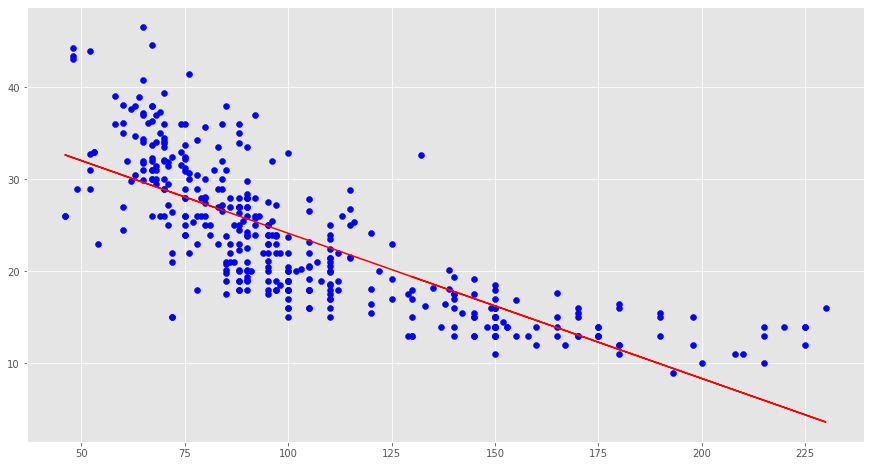

In [28]:
# predictions = 39.9359 + (-0.1578)*df['horsepower'].values
predictions = results.fittedvalues # more accurate (no/less roundings)

fig = plt.figure(figsize=(15,8))

plt.scatter(df.horsepower, df.mpg, color='blue')
plt.plot(df.horsepower, predictions, color='red')

c) Use the plot() function to produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.

In [29]:
# Residual plots

Text(0.5, 1.0, 'Residual plot')

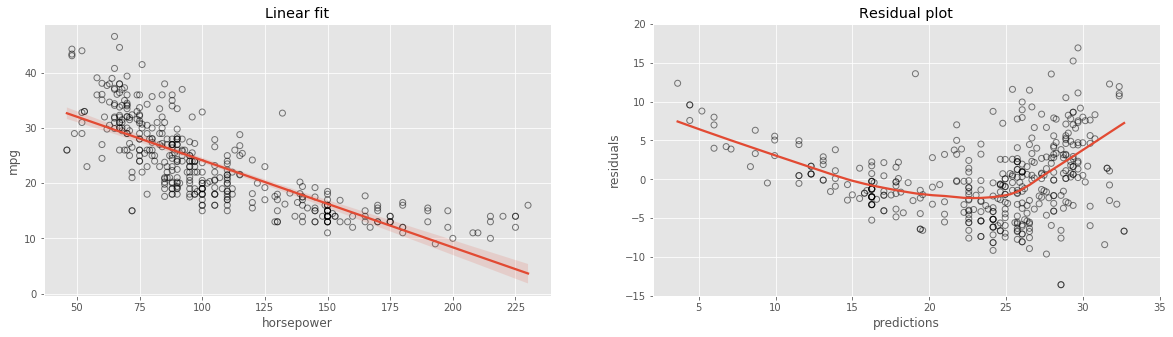

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))

sns.regplot('horsepower', 'mpg', data=df, ax=ax1,
           scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.set_title('Linear fit')

sns.regplot(predictions, residuals, ax=ax2, lowess=True,
           scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.set_xlim(2,35)
ax2.set_ylim(-15,20)
ax2.set_xlabel('predictions')
ax2.set_ylabel('residuals')
ax2.set_title('Residual plot')

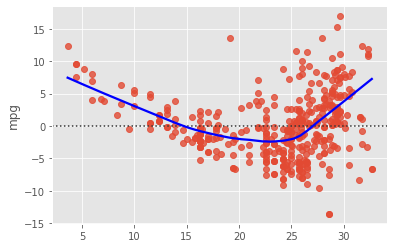

In [31]:
# seaborn built-in for residual plots
sns.residplot(predictions, 'mpg', data=df, lowess=True, line_kws={'color': 'blue'})

response-predictor chart with the regression line
- a slight U pattern in data indicates a non-linear relationship,
- no extreme outliers.

residual plot:
- a slight U pattern in data and the linear fit indicate a non-linear relationship,
- shows the funnel shape of data - heteroscedasticity (non-constatnt variance of error terms,
- no extreme outliers,

(internally studentized) residual plot:
- Observations whose studentized residuals are greater than 3 in absolute value are possible outliers. There are 2 such cases but do not look extreme.

internally studentized residuals vs leverage plot:
- no high leverage points (low cook's distance values)

Q-Q plot:
- the data points follow the 45-degree line without deviating strongly, so we can assume that the residuals are normally distributed.



In [32]:
# residuals and studentized residuals plots

In [33]:
# studentized_residuals = data.loc[:,'Student Residual']
inter_studentized_resid = results.get_influence().resid_studentized_internal # an array

Text(0, 0.5, 'inter_studentized_resid')

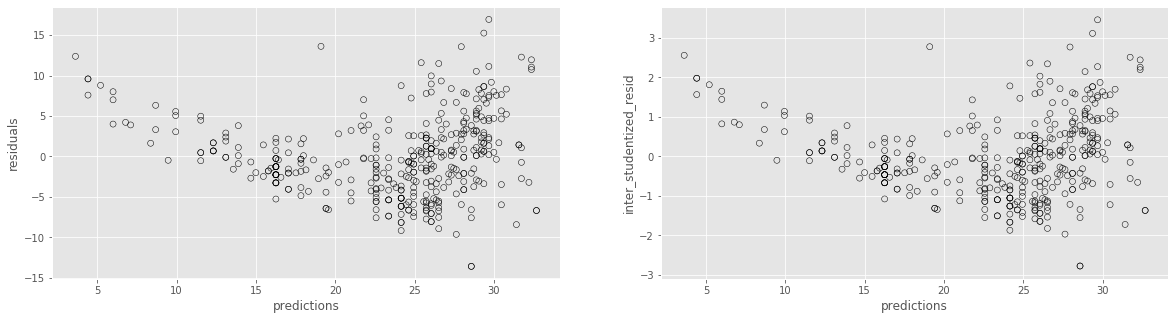

In [34]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))

ax1.scatter(predictions, residuals, facecolors='none', edgecolors='k')
ax1.set_xlabel('predictions')
ax1.set_ylabel('residuals')

ax2.scatter(predictions, inter_studentized_resid, facecolors='none', edgecolors='k')
ax2.set_xlabel('predictions')
ax2.set_ylabel('inter_studentized_resid')

In [35]:
inter_studentized_resid[inter_studentized_resid>3]

array([3.45890854, 3.11425618])

In [36]:
len(inter_studentized_resid[inter_studentized_resid<=3])

390

In [37]:
# Leverage and Studentized Residuals plot

Studentized residuals are udoubtedly better in detecting outliers, and, maybe, a little bit better in heteroscedasticity inspection.

Standardized: this is actually the raw residuals divided by the true standard deviation of the residuals. As the true standard deviation is rarely known, a standardized residual is almost never used.

Internally Studentized: because the true standard deviation of the residuals is not typically known, the estimated standard deviation is used instead. This is an interanlly studentized residual, and it is sometimes called standardized.

Externally Studentized: the same as the internally studentized residual, except that the estimate of the standard deviation of the residuals is calcuated from a regression leaving out the observation in question.



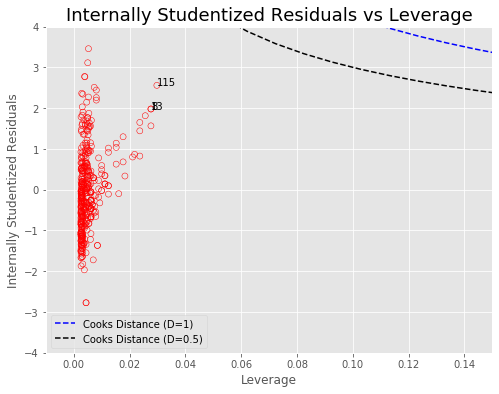

In [38]:
from statsmodels.stats.outliers_influence import OLSInfluence

leverage = pd.Series(results.get_influence().hat_matrix_diag) # a series as indices required for the annotations below
inter_studentized_resid = results.get_influence().resid_studentized_internal # an array

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leverage, inter_studentized_resid,facecolors='none', edgecolors='r')
plt.title('Internally Studentized Residuals vs Leverage', fontsize=18)
ax.set_xlabel('Leverage')
ax.set_ylabel('Internally Studentized Residuals')
plt.ylim(-4, 4) # set manually
plt.xlim(-0.01, 0.15) # set manually


# annotations
model_cooks = results.get_influence().cooks_distance[0] # returns a tuple with cook's distances and p-values
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    ax.annotate(i, xy=(leverage[i], inter_studentized_resid[i]))


# adding cook's distance contours
def one_line(x):
    return np.sqrt((1 * len(results.params) * (1 - x)) / x)

def point_five_line(x):
    return np.sqrt((0.5 * len(results.params) * (1 - x)) / x)
     
def show_cooks_distance_lines(tx,inc,color,label):
    plt.plot(inc,tx(inc), label=label,color=color, ls='--')
    

show_cooks_distance_lines(one_line,
                        np.linspace(0.001, 0.500, 50),
                          'blue',
                          'Cooks Distance (D=1)' )

show_cooks_distance_lines(point_five_line,
                          np.linspace(0.001, 0.500, 50),
                          'black',
                          'Cooks Distance (D=0.5)')

plt.legend(loc='best')

In [39]:
results.params

const         39.935861
horsepower    -0.157845
dtype: float64

In [40]:
len(model_cooks)

392

In [41]:
4/392

0.01020408163265306

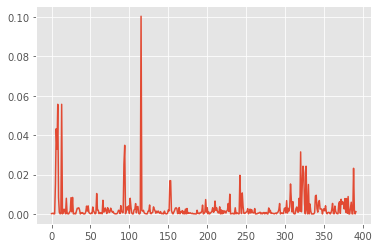

In [42]:
plt.plot(data['Cook\'s D'])

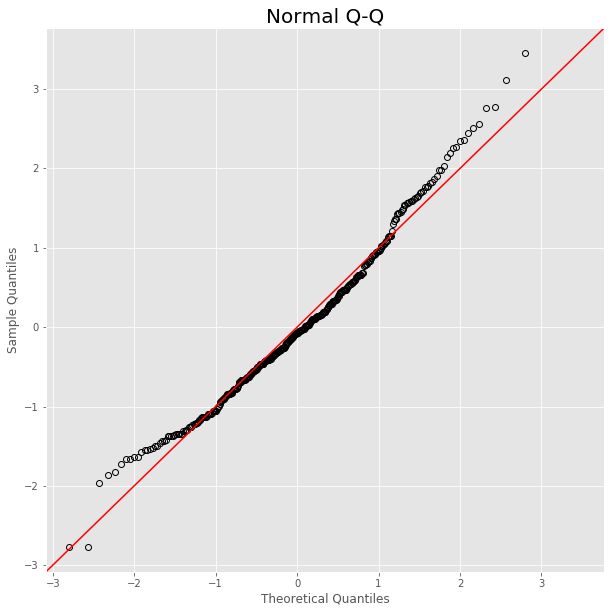

In [43]:
plt.rc('figure', figsize=(10,10))

probplot = sm.ProbPlot(results.get_influence().resid_studentized_internal, fit=True)
fig = probplot.qqplot(line='45', marker='o', color='black',mfc='none')
plt.title('Normal Q-Q', fontsize=20)
plt.show()

#### 9

(a) Produce a scatterplot matrix which includes all of the variables
in the data set.

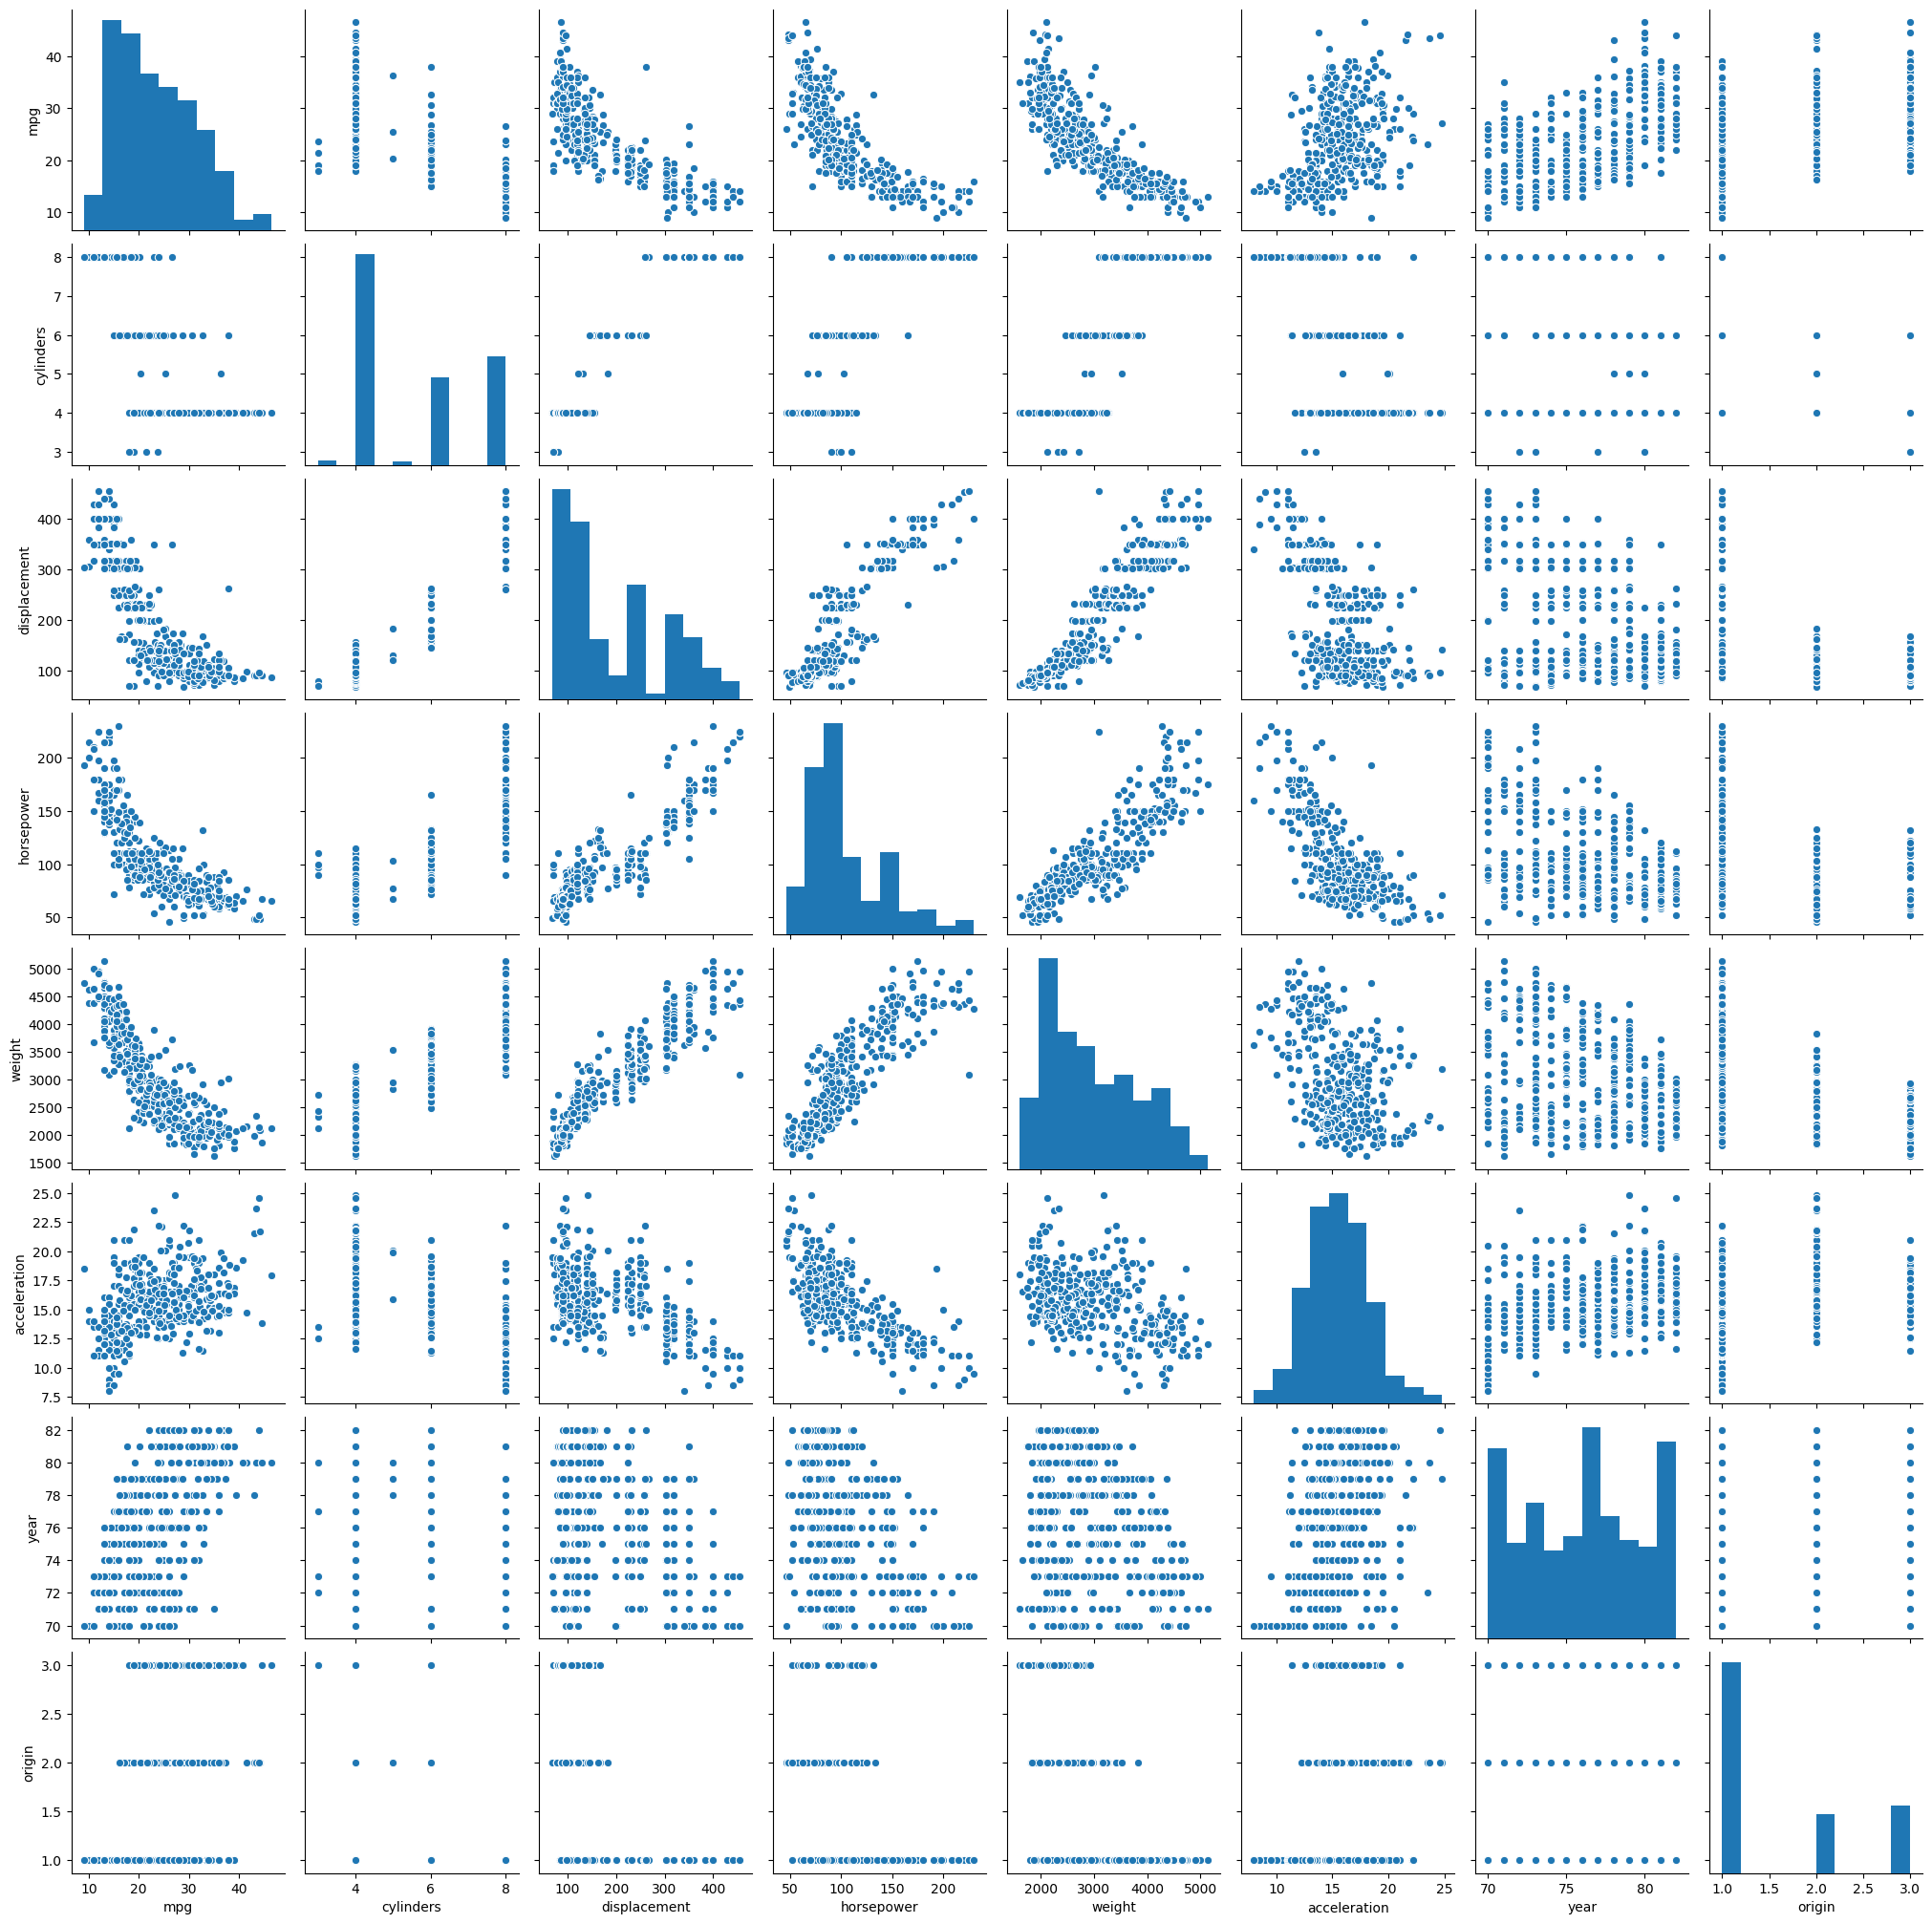

In [44]:
sns.reset_defaults() # to get back to the blue color
sns.pairplot(df, palette='deep')

(b) Compute the matrix of correlations between the variables.


In [45]:
plt.style.use('ggplot')

In [46]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


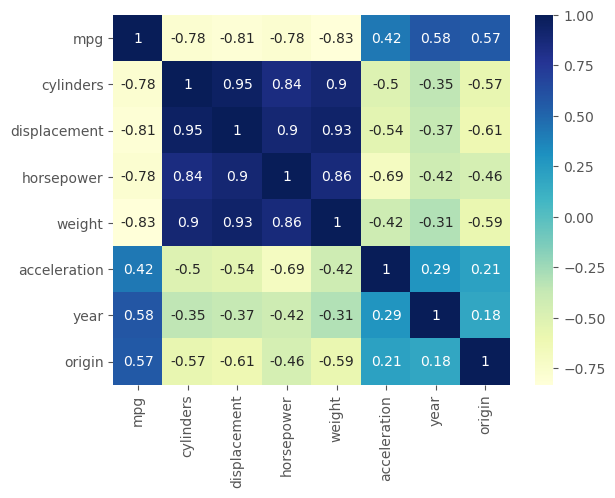

In [47]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

(c) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors.

In [48]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
X = sm.add_constant(X)
y = df['mpg']

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 27 Feb 2021   Prob (F-statistic):          2.04e-139
Time:                        07:49:22   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i. Is there a relationship between the predictors and the response?

Yes, there is a relatioship between the predictors and the response by testing the null hypothesis of whether all the regression coefficients are zero. The F -statistic is far from 1 (with a small p-value), indicating evidence against the null hypothesis.

ii. Which predictors appear to have a statistically significant relationship to the response?

Looking at the p-values associated with each predictor’s t-statistic,the predictors that have statistically significant relationship to the response are: displacement, weight, year and origin.

iii. What does the coefficient for the year variable suggest?

The coefficient of year varaible suggests that if all the other predictors are kept constant, increase of 1 in year results in 0.7508 increase in mpg (the newer a car is, less fuel is needed to drive the same distance).

(d) produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?

In [49]:
# Residual plots

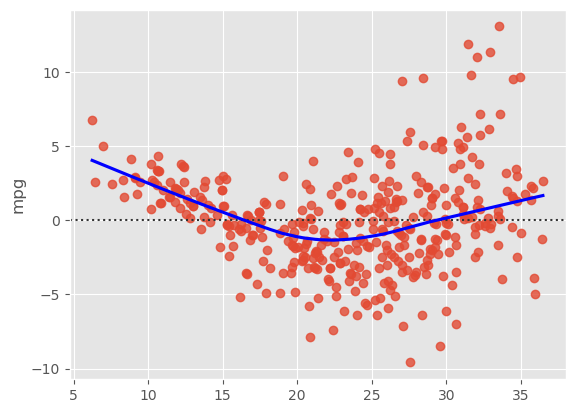

In [50]:
# seaborn built-in for residual plots

sns.residplot(results.fittedvalues, 'mpg', data=df, lowess=True, line_kws={'color': 'blue'})

REWRITE

residual plot:
- an U pattern in data indicates a non-linear relationship,
- shows the funnel shape of data - heteroscedasticity (non-constatnt variance of error terms,
- no extreme outliers,

(internally studentized) residual plot:
- Observations whose studentized residuals are greater than 3 in absolute value are possible outliers. There are a few cases like that (2.84982284, 2.92396761, 2.9283754, 2.93864625, 2.96274154, 3.34468063, 3.44488536, 3.6310711 , 3.9518941)

internally studentized residuals vs leverage plot:
- one point (13) has a relatively high leverage

Q-Q plot:
- the data points follow the 45-degree line without deviating strongly, so we can assume that the residuals are normally distributed. ## DOUBLECHECK


In [51]:
# residuals and studentized residuals plots

In [52]:
# studentized_residuals = data.loc[:,'Student Residual']
inter_studentized_resid = results.get_influence().resid_studentized_internal # an array

Text(0, 0.5, 'inter_studentized_resid')

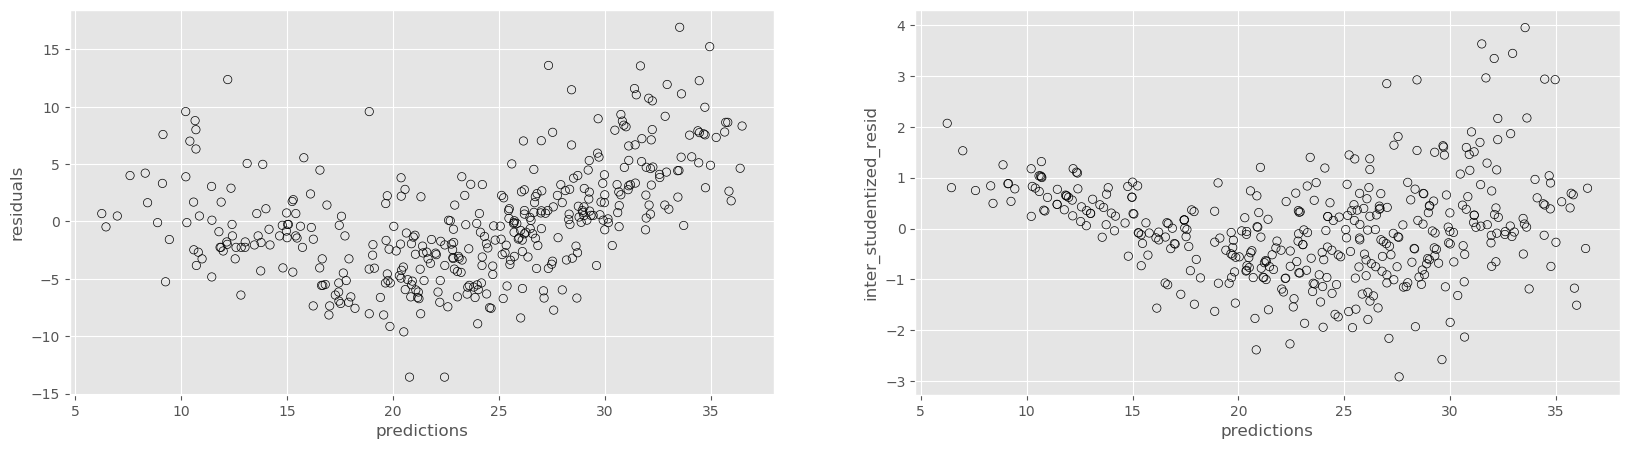

In [53]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))

ax1.scatter(results.fittedvalues, residuals, facecolors='none', edgecolors='k')
ax1.set_xlabel('predictions')
ax1.set_ylabel('residuals')

ax2.scatter(results.fittedvalues, inter_studentized_resid, facecolors='none', edgecolors='k')
ax2.set_xlabel('predictions')
ax2.set_ylabel('inter_studentized_resid')

In [54]:
np.sort(inter_studentized_resid[inter_studentized_resid>2.5])

array([2.84982284, 2.92396761, 2.9283754 , 2.93864625, 2.96274154,
       3.34468063, 3.44488536, 3.6310711 , 3.9518941 ])

In [55]:
len(inter_studentized_resid[inter_studentized_resid<=2.5])

383

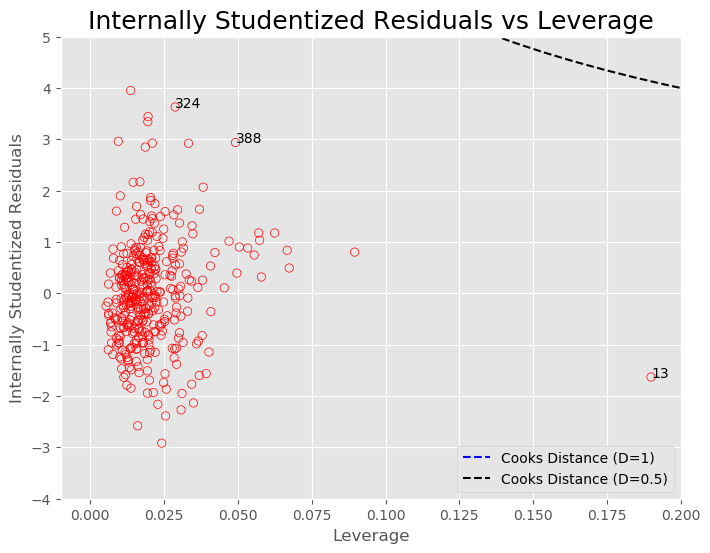

In [56]:
leverage = pd.Series(results.get_influence().hat_matrix_diag) # a series as indices required for the annotations below
inter_studentized_resid = results.get_influence().resid_studentized_internal # an array

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leverage, inter_studentized_resid,facecolors='none', edgecolors='r')
plt.title('Internally Studentized Residuals vs Leverage', fontsize=18)
ax.set_xlabel('Leverage')
ax.set_ylabel('Internally Studentized Residuals')
plt.ylim(-4, 5) # set manually
plt.xlim(-0.01, 0.20) # set manually


# annotations
model_cooks = results.get_influence().cooks_distance[0] # returns a tuple with cook's distances and p-values
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    ax.annotate(i, xy=(leverage[i], inter_studentized_resid[i]))


# adding cook's distance contours
def one_line(x):
    return np.sqrt((1 * len(results.params) * (1 - x)) / x)

def point_five_line(x):
    return np.sqrt((0.5 * len(results.params) * (1 - x)) / x)
     
def show_cooks_distance_lines(tx,inc,color,label):
    plt.plot(inc,tx(inc), label=label,color=color, ls='--')
    

show_cooks_distance_lines(one_line,
                        np.linspace(0.001, 0.500, 50),
                          'blue',
                          'Cooks Distance (D=1)' )

show_cooks_distance_lines(point_five_line,
                          np.linspace(0.001, 0.500, 50),
                          'black',
                          'Cooks Distance (D=0.5)')

plt.legend(loc='lower right')

In [57]:
model_cooks[13]

0.07780083513972955

In [58]:
results.params

const          -17.218435
cylinders       -0.493376
displacement     0.019896
horsepower      -0.016951
weight          -0.006474
acceleration     0.080576
year             0.750773
origin           1.426140
dtype: float64

In [59]:
len(model_cooks)

392

In [60]:
4/392

0.01020408163265306

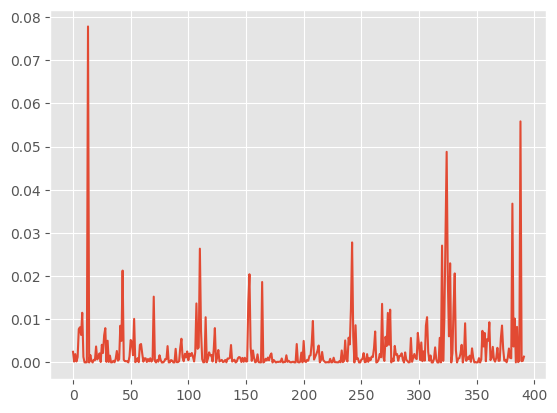

In [61]:
plt.plot(model_cooks)

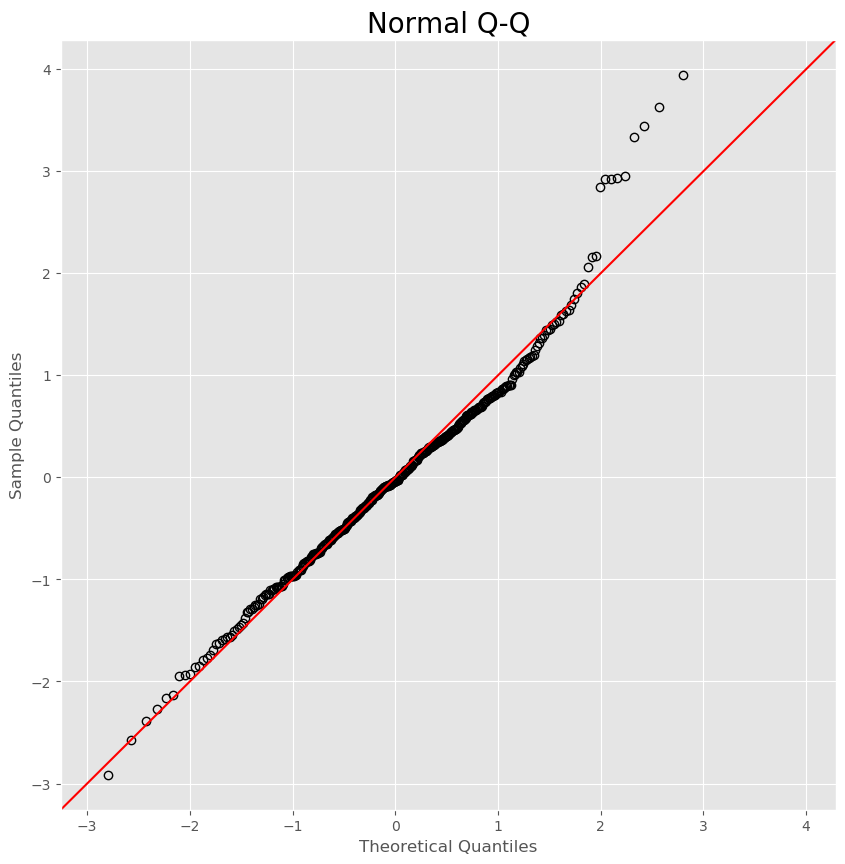

In [62]:
plt.rc('figure', figsize=(10,10))

probplot = sm.ProbPlot(results.get_influence().resid_studentized_internal, fit=True)
fig = probplot.qqplot(line='45', marker='o', color='black',mfc='none')
plt.title('Normal Q-Q', fontsize=20)
plt.show()

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,763.557531,const
1,10.737535,cylinders
2,21.836792,displacement
3,9.943693,horsepower
4,10.831260,weight
5,2.625806,acceleration
6,1.244952,year
7,1.772386,origin


As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity

(e) Fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [64]:
# Getting all interaction effects

from sklearn.preprocessing import PolynomialFeatures

interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True) # "interaction_only=False", it returns also the squared values of predictors
X_inter = pd.DataFrame(interaction.fit_transform(X), columns=interaction.get_feature_names(input_features=X.columns))

X_inter.head()

#  from: 

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin,const cylinders,const displacement,...,horsepower weight,horsepower acceleration,horsepower year,horsepower origin,weight acceleration,weight year,weight origin,acceleration year,acceleration origin,year origin
0,1.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,8.0,307.0,...,455520.0,1560.0,9100.0,130.0,42048.0,245280.0,3504.0,840.0,12.0,70.0
1,1.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,8.0,350.0,...,609345.0,1897.5,11550.0,165.0,42469.5,258510.0,3693.0,805.0,11.5,70.0
2,1.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,8.0,318.0,...,515400.0,1650.0,10500.0,150.0,37796.0,240520.0,3436.0,770.0,11.0,70.0
3,1.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,8.0,304.0,...,514950.0,1800.0,10500.0,150.0,41196.0,240310.0,3433.0,840.0,12.0,70.0
4,1.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,8.0,302.0,...,482860.0,1470.0,9800.0,140.0,36214.5,241430.0,3449.0,735.0,10.5,70.0


In [65]:
X_inter.columns

Index(['const', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'const cylinders',
       'const displacement', 'const horsepower', 'const weight',
       'const acceleration', 'const year', 'const origin',
       'cylinders displacement', 'cylinders horsepower', 'cylinders weight',
       'cylinders acceleration', 'cylinders year', 'cylinders origin',
       'displacement horsepower', 'displacement weight',
       'displacement acceleration', 'displacement year', 'displacement origin',
       'horsepower weight', 'horsepower acceleration', 'horsepower year',
       'horsepower origin', 'weight acceleration', 'weight year',
       'weight origin', 'acceleration year', 'acceleration origin',
       'year origin'],
      dtype='object')

In [66]:
# Not as straightforward as it looked initially (increased chance of false positive findings, etc.):
# https://bookdown.org/max/FES/complete-enumeration.html

# A simple interaction example instead (for time being) 

In [67]:
X_with_inter = pd.concat([X, X_inter.loc[:,'displacement horsepower']], axis=1)
X_with_inter.head()

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin,displacement horsepower
0,1.0,8,307.0,130,3504,12.0,70,1,39910.0
1,1.0,8,350.0,165,3693,11.5,70,1,57750.0
2,1.0,8,318.0,150,3436,11.0,70,1,47700.0
3,1.0,8,304.0,150,3433,12.0,70,1,45600.0
4,1.0,8,302.0,140,3449,10.5,70,1,42280.0


In [68]:
model_with_inter = sm.OLS(y, X_with_inter)
results_with_inter = model_with_inter.fit()

results_with_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     303.1
Date:                Sat, 27 Feb 2021   Prob (F-statistic):          1.59e-160
Time:                        07:49:25   Log-Likelihood:                -970.71
No. Observations:                 392   AIC:                             1959.
Df Residuals:                     383   BIC:                             1995.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.8935      4.302     -0.440      0.660     -10.352       6.565
cylinders                   0.6466      0.302      2.143      0.033       0.053       1.240
displacement               -0.0749      0.011     -6.859      0.000      -0.096      -0.053
horsepower                 -0.1975      0.021     -9.624      0.000      -0.238      -0.157
weight                     -0.0031      0.001     -4.861      0.000      -0.004      -0.002
acceleration               -0.2131      0.091     -2.351      0.019      -0.391      -0.035
year                        0.7379      0.045     16.534      0.000       0.650       0.826
origin                      0.6891      0.253      2.727      0.007       0.192       1.186
displacement horsepower     0.0005   4.81e-05     10.878      0.000       0.000       0.001
==============================================================================
Omnibus:                       45.547   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.147
Skew:                           0.650   Prob(JB):                     1.61e-20
Kurtosis:                       4.972   Cond. No.                     9.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The interaction effect between displacement and horsepower is statistically significant.

Increased model accuracy (the R-squared statistic improved from 0.818 to 0.864)

(f) Try a few different transformations of the variables, such as
log(X), X, X 2 . Comment on your findings.

In [69]:
# using "OLS.from_formula" (alternatively, add new columns with transformations and refer to them)
# https://www.statsmodels.org/dev/examples/notebooks/generated/formulas.html

model_with_transf = sm.OLS.from_formula(formula='mpg ~ cylinders + (displacement**2)', data=df)
results_with_transf = model_with_transf.fit()

results_with_transf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     360.8
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           2.41e-89
Time:                        07:49:25   Log-Likelihood:                -1155.6
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     389   BIC:                             2329.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.5377      1.197     30.534      0.000      34.185      38.890
cylinders       -0.5763      0.443     -1.300      0.194      -1.448       0.295
displacement    -0.0511      0.007     -7.074      0.000      -0.065      -0.037
==============================================================================
Omnibus:                       41.461   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.956
Skew:                           0.700   Prob(JB):                     2.13e-14
Kurtosis:                       4.377   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

10

(a) Fit a multiple regression model to predict Sales using Price ,
Urban , and US .

In [70]:
data_path = getcwd() + "/data/Carseats.csv"
carseats_df = pd.read_csv(data_path)

carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [71]:
carseats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [72]:
# checking for unique values in the two needed qualitative columns
(carseats_df['Urban'].append(carseats_df['US'])).unique()

array(['Yes', 'No'], dtype=object)

In [73]:
# mapping of 'Yes': 1, 'No': 0
carseats_df['Urban'] = carseats_df['Urban'].map({'Yes': 1, 'No': 0})
carseats_df['US'] = carseats_df['US'].map({'Yes': 1, 'No': 0})

In [74]:
X = carseats_df[['Price', 'Urban', 'US']]
X = sm.add_constant(X)
Y = carseats_df['Sales']

model = sm.OLS(Y, X)
carseats_results = model.fit()

carseats_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           2.39e-23
Time:                        07:49:25   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

const - the number of car seats sold on average when all other predictors are disregarded

Given that the other predictors don't change:

Price - 1 unit increase in price results in sales decrease of approx. 54 carseats (0,0545x1000)

Urban - not statistacally significant (if it was, the location of shops in urban areas ('Yes':1) would impact sales negatively (coef = -0.0219))

US - if the store is in US, the sales increase by approx. 1200 units

(c) Write out the model in equation form, being careful to handle
the qualitative variables properly.

Sales = 13.0435 -0.0545 * Price - 0.0219 * Urban + 1.2006 * US

(d) For which of the predictors can you reject the null hypothesis
H 0 : β j = 0?

Price and US - small p-values (it is unlikely to observe such a substantial relationship due to chance, in absence of any real association)

(e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

In [75]:
X = carseats_df[['Price', 'US']]
X = sm.add_constant(X)
Y = carseats_df['Sales']

model2 = sm.OLS(Y, X)
carseats_results2 = model.fit()

carseats_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           2.39e-23
Time:                        07:49:25   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(f) How well do the models in (a) and (e) fit the data?

The R2-statistic is the same for both models, however, the more variables the higher R2. Hence, the second model seems to be better (both are bad, though).

The RSE values almost identical (calculated below).

In [76]:
# to get RSE for the first model
predictions1 = carseats_results.fittedvalues
residuals1 = carseats_df['Sales'].values - predictions1

# Residual Sum of Squares
RSS = np.sum(residuals1**2)

# Residual Standard Error
degrees_of_freedom  = len(carseats_df['Sales'].values)-2
RSE = np.sqrt(RSS/degrees_of_freedom)
RSE

2.4662723236482114

In [77]:
# to get RSE for the Second model
predictions2 = carseats_results2.fittedvalues
residuals2 = carseats_df['Sales'].values - predictions2

# Residual Sum of Squares
RSS = np.sum(residuals2**2)

# Residual Standard Error
degrees_of_freedom  = len(carseats_df['Sales'].values)-2
RSE_2 = np.sqrt(RSS/degrees_of_freedom)
RSE_2

2.4662723236482114

Exercises 11&12 (without an intercept) skipped fo now.

https://stats.stackexchange.com/questions/7948/when-is-it-ok-to-remove-the-intercept-in-a-linear-regression-model
(also other explanations and when it is valid to drop an intercept):

Most multiple regression models include a constant term (i.e., the intercept), since this ensures that the model will be unbiased--i.e., the mean of the residuals will be exactly zero. (The coefficients in a regression model are estimated by least squares--i.e., minimizing the mean squared error. Now, the mean squared error is equal to the variance of the errors plus the square of their mean: this is a mathematical identity. Changing the value of the constant in the model changes the mean of the errors but doesn't affect the variance. Hence, if the sum of squared errors is to be minimized, the constant must be chosen such that the mean of the errors is zero.)

In a simple regression model, the constant represents the Y-intercept of the regression line, in unstandardized form. In a multiple regression model, the constant represents the value that would be predicted for the dependent variable if all the independent variables were simultaneously equal to zero--a situation which may not physically or economically meaningful. If you are not particularly interested in what would happen if all the independent variables were simultaneously zero, then you normally leave the constant in the model regardless of its statistical significance. In addition to ensuring that the in-sample errors are unbiased, the presence of the constant allows the regression line to "seek its own level" and provide the best fit to data which may only be locally linear.

However, in rare cases you may wish to exclude the constant from the model. This is a model-fitting option in the regression procedure in any software package, and it is sometimes referred to as regression through the origin, or RTO for short.

____
https://stats.stackexchange.com/questions/26176/removal-of-statistically-significant-intercept-term-increases-r2-in-linear-mo/26205#26205 (why R2-statistics shouldn't be compared between models with and without an intercept in R - explanation with linear algebra) 


13

In [78]:
np.random.seed(1)

(a) Create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.

In [79]:
x = np.random.normal(loc=0, scale=1, size=(100,1))
# 'scale' takes a standard deviation (square root of variance) as an input
# size = (100, 1) instead of size = 100 -> the correct array shape for models to use later

(b) Create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

In [80]:
eps = np.random.normal(loc=0, scale=0.5, size=(100,1))

(c) Using x and eps , generate a vector y according to the model

Y = −1 + 0.5X + e

What is the length of the vector y ? What are the values of β 0
and β 1 in this linear model?

In [81]:
y = -1 + 0.5*x + eps

In [82]:
y.size

100

The vector y has a length of 100, β0=−1 and β1=0.5 .

(d) Create a scatterplot displaying the relationship between x and
y . Comment on what you observe.

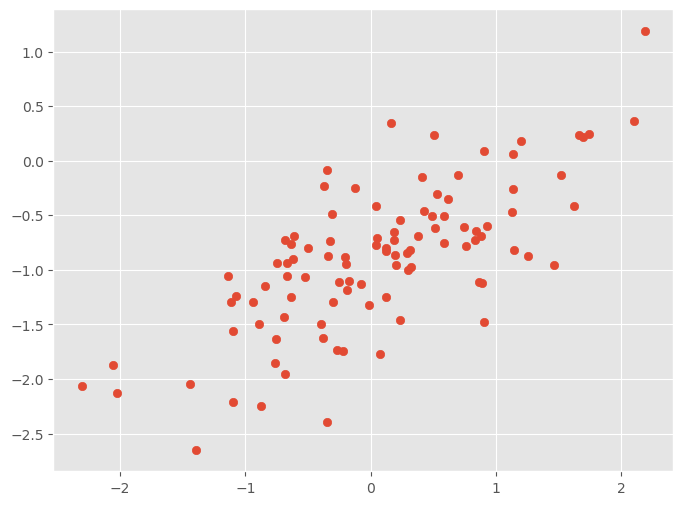

In [83]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x, y)


It looks like there is a linear relationship with a positive slope.

e) Fit a least squares linear model to predict y using x . Comment
on the model obtained. How do β̂ 0 and β̂ 1 compare to β 0 and
β 1 ?

In [84]:
x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           2.20e-17
Time:                        07:49:26   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.000      -1.020      -0.833
x1             0.5477      0.053     10.342      0.000       0.443       0.653
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients are quite similar, so the model did quite a good work here (both statistically significant). The R2-statistic value (~0.458) means that nearly half of the variability in Y is explained by the model.

(f) Display the least squares line on the scatterplot obtained in (d).
Draw the population regression line on the plot, in a different
color. Use the legend() command to create an appropriate leg-
end.


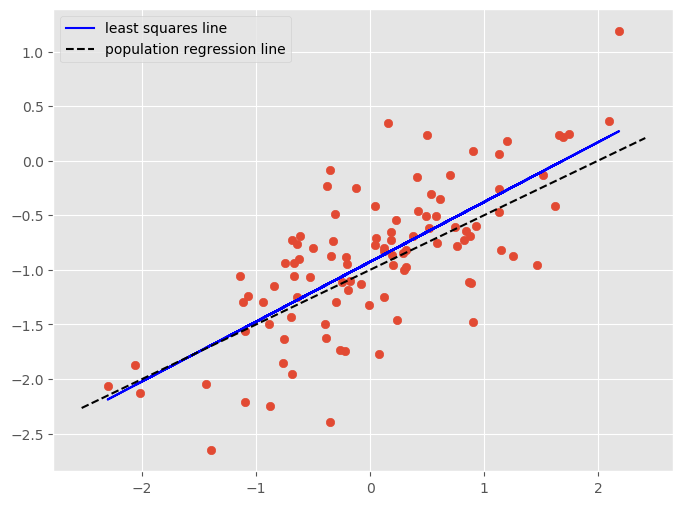

In [85]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x[:,1], y) # x[:,1] instead of x as the intercept was added before

# least squares line
ax.plot(x[:,1], results.fittedvalues, c='blue', label='least squares line')

# population line
x_vals = np.array(ax.get_xlim())
y_vals = -1 +0.5*x_vals
ax.plot(x_vals, y_vals, label='population regression line', color='k', linestyle='--')



ax.legend(loc='best')

(g) Now fit a polynomial regression model that predicts y using x
and x 2 . Is there evidence that the quadratic term improves the
model fit? Explain your answer.

In [86]:
x2 = (x[:,1]**2).reshape(-1,1)
x_including_x2 = np.append(x, x2, axis=1)
np.hstack((x, (x[:,1]**2).reshape(-1,1))) # alternative to append

array([[ 1.00000000e+00,  1.62434536e+00,  2.63849786e+00],
       [ 1.00000000e+00, -6.11756414e-01,  3.74245910e-01],
       [ 1.00000000e+00, -5.28171752e-01,  2.78965400e-01],
       [ 1.00000000e+00, -1.07296862e+00,  1.15126166e+00],
       [ 1.00000000e+00,  8.65407629e-01,  7.48930365e-01],
       [ 1.00000000e+00, -2.30153870e+00,  5.29708037e+00],
       [ 1.00000000e+00,  1.74481176e+00,  3.04436809e+00],
       [ 1.00000000e+00, -7.61206901e-01,  5.79435946e-01],
       [ 1.00000000e+00,  3.19039096e-01,  1.01785945e-01],
       [ 1.00000000e+00, -2.49370375e-01,  6.21855842e-02],
       [ 1.00000000e+00,  1.46210794e+00,  2.13775962e+00],
       [ 1.00000000e+00, -2.06014071e+00,  4.24417974e+00],
       [ 1.00000000e+00, -3.22417204e-01,  1.03952853e-01],
       [ 1.00000000e+00, -3.84054355e-01,  1.47497747e-01],
       [ 1.00000000e+00,  1.13376944e+00,  1.28543315e+00],
       [ 1.00000000e+00, -1.09989127e+00,  1.20976080e+00],
       [ 1.00000000e+00, -1.72428208e-01

In [87]:
model_with_x2 = sm.OLS(y,x_including_x2)
results_with_x2 = model_with_x2.fit()

results_with_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           2.83e-16
Time:                        07:49:26   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9325      0.058    -16.158      0.000      -1.047      -0.818
x1             0.5468      0.053     10.229      0.000       0.441       0.653
x2             0.0077      0.043      0.181      0.856      -0.077       0.092
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R2-statistics are the same, RSE values should be also calculated. Nonetheless, x2 has large p-value (not stastically significant), so it does not improve the model (no relationship with Y). 

(h) Repeat (a)–(f) after modifying the data generation process in
such a way that there is less noise in the data. The model (Y = −1 + 0.5X + e)
should remain the same. You can do this by decreasing the vari-
ance of the normal distribution used to generate the error term
 in (b). Describe your results.

In [88]:
# skipped -> it would improve model accuracy (R2 & RSE)

(j) What are the confidence intervals for β 0 and β 1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

In [89]:
# see the results for the main model above in the summary table
# the more noise, the wider confidence intervals

14

In [90]:
np.random.seed(1)
x1 = np.random.rand(100, 1)
x2 = 0.5*x1 + np.random.normal(size = (100, 1))/10
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size = (100, 1))

(b) What is the correlation between x1 and x2 ? Create a scatterplot
displaying the relationship between the variables.

In [91]:
np.corrcoef(x1, x2, rowvar = False)

array([[1.        , 0.83905962],
       [0.83905962, 1.        ]])

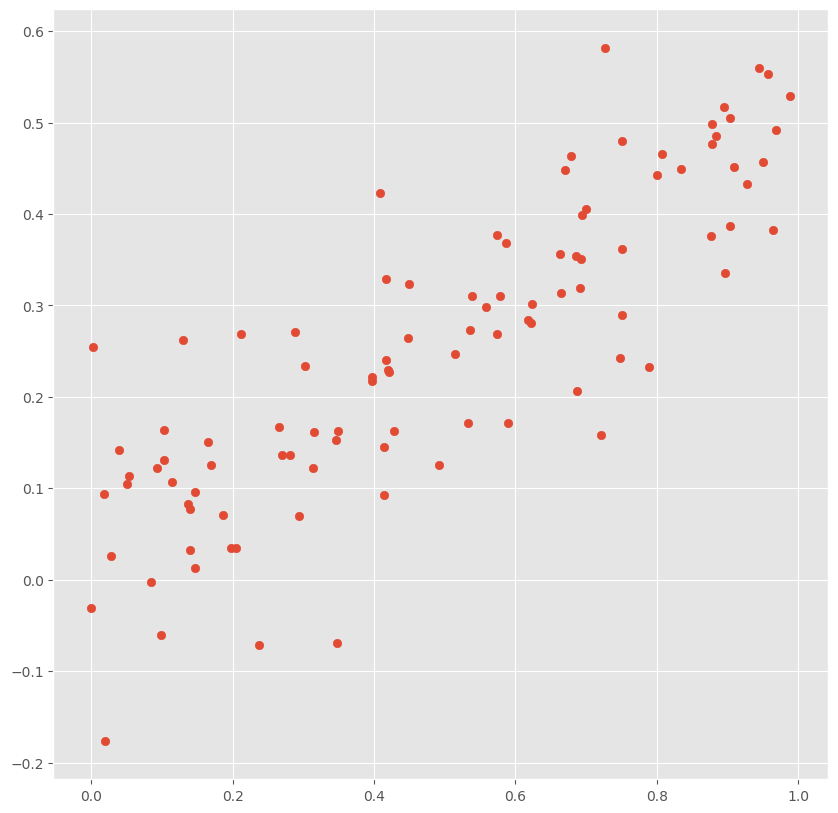

In [92]:
plt.scatter(x1, x2)

(c) Using this data, fit a least squares regression to predict y using
x1 and x2 . Describe the results obtained. What are β̂ 0 , β̂ 1 , and
β̂ 2 ? How do these relate to the true β 0 , β 1 , and β 2 ? Can you
reject the null hypothesis H 0 : β 1 = 0? How about the null
hypothesis H 0 : β 2 = 0?

In [93]:
ex14_df = pd.DataFrame(np.hstack((np.ones((100,1)), x1,x2,y)), columns=['const', 'x1', 'x2', 'y'])

In [94]:
ex14c_model = sm.OLS.from_formula('y ~ x1 + x2', data=ex14_df) # intercept added by default
ex14c_results = ex14c_model.fit()

ex14c_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           4.40e-07
Time:                        07:49:27   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.000       1.795       2.584
x1             0.7046      0.637      1.107      0.271      -0.559       1.968
x2             2.5024      1.140      2.194      0.031       0.239       4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size = (100, 1))

Only B0 is relatively close to the real value. B1 not significant (because of the p-value - not sufficent evidence to reject H0). B2 signifacnt but by not big margin.

(d) Now fit a least squares regression to predict y using only x1 .
Comment on your results. Can you reject the null hypothesis
H 0 : β 1 = 0?

In [95]:
ex14d_model = sm.OLS.from_formula('y ~ x1', data=ex14_df) # intercept added by default
ex14d_results = ex14d_model.fit()

ex14d_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           6.68e-07
Time:                        07:49:27   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.000       1.850       2.647
x1             1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the null hypothesis H 0 : β 1 = 0 can be rejected as per p-value and t-statistic.

(e) Now fit a least squares regression to predict y using only x2 .
Comment on your results. Can you reject the null hypothesis
H 0 : β 1 = 0?

In [96]:
ex14e_model = sm.OLS.from_formula('y ~ x2', data=ex14_df) # intercept added by default
ex14e_results = ex14e_model.fit()

ex14e_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           1.09e-07
Time:                        07:49:27   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.000       1.895       2.636
x2             3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the null hypothesis H 0 : β 1 = 0 can be rejected as per p-value and t-statistic.

(f) Do the results obtained in (c)–(e) contradict each other? Explain
your answer.

no, because of the strong colinearity (corr(x1,x2)= 0.83905962). It decreases model accuracy (overestimates standard errors and underestimates t-statistics for coefficient estimates). Consequently, the power of hyphotesis test is reduced (we may fail to reject H0).

(g)

(g) Now suppose we obtain one additional observation, which was
unfortunately mismeasured.
> x1 = c ( x1 , 0.1)

> x2 = c ( x2 , 0.8)

> y = c (y ,6)

Re-fit the linear models from (c) to (e) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

In [129]:
# adding the new observation
new_obs = {i: j for i,j in zip(ex14_df.columns, [1, 0.1, 0.8, 6])}
ex14g_df = ex14_df.append(new_obs,ignore_index=True)
ex14g_df.tail()

,const,x1,x2,y
96,1.0,0.903380,0.386998,4.758863
97,1.0,0.573679,0.376988,4.803815
98,1.0,0.002870,0.254268,2.840827
99,1.0,0.617145,0.283709,4.204311
100,1.0,0.100000,0.800000,6.000000


In [131]:
np.corrcoef(ex14g_df['x1'], ex14g_df['x2'], rowvar = False)

array([[1.        , 0.74883922],
       [0.74883922, 1.        ]])

In [130]:
model_14g_x1x2 = sm.OLS.from_formula('y ~ x1 + x2', data=ex14g_df)
results_14g_x1x2 = model_14g_x1x2.fit()

results_14g_x1x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           5.51e-08
Time:                        10:26:37   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1996      0.199     11.041      0.000       1.804       2.595
x1             0.2200      0.520      0.423      0.673      -0.812       1.252
x2             3.4392      0.892      3.857      0.000       1.670       5.209
==============================================================================
Omnibus:                        1.246   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.094
Skew:                          -0.254   Prob(JB):                        0.579
Kurtosis:                       2.956   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
model_14g_x1 = sm.OLS.from_formula('y ~ x1', data=ex14g_df)
results_14g_x1 = model_14g_x1.fit()

results_14g_x1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           9.15e-06
Time:                        10:28:22   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3583      0.208     11.331      0.000       1.945       2.771
x1             1.7225      0.368      4.679      0.000       0.992       2.453
==============================================================================
Omnibus:                        1.904   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.388
Skew:                           0.263   Prob(JB):                        0.500
Kurtosis:                       3.232   Cond. No.                         4.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
model_14g_x2 = sm.OLS.from_formula('y ~ x2', data=ex14g_df)
results_14g_x2 = model_14g_x2.fit()

results_14g_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           7.41e-09
Time:                        10:28:44   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2331      0.182     12.271      0.000       1.872       2.594
x2             3.7216      0.589      6.324      0.000       2.554       4.889
==============================================================================
Omnibus:                        1.271   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.094
Skew:                          -0.255   Prob(JB):                        0.579
Kurtosis:                       2.973   Cond. No.                         6.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The new observation decreased the colinearity between x1 and x2.It resulted in better model accuracy metrics and slightly mitigated negative impact on the power of the hyphotesis test. Nonetheless, the correlation is still quite substantial (and consequently, colinearity impacts the model).

In [140]:
type(results_14g_x2.summary().tables[0])

statsmodels.iolib.table.SimpleTable

In [229]:
results_14g_x2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.2331,0.182,12.271,0.000,1.872,2.594
x2,3.7216,0.589,6.324,0.000,2.554,4.889


In [273]:
temp = pd.read_html(results_14g_x2.summary().as_html())[0]
# 1-coefficients, 2-remaining summary part

new_col_names = ['name', 'value']


new_df = pd.DataFrame(columns=new_col_names)


temp1 = temp.iloc[:, 0:2]
temp1.columns = new_col_names

temp2 = temp.iloc[:, 2:4].dropna()
temp2.columns = new_col_names

new_df = pd.concat([new_df,temp1, temp2], ignore_index=True)
new_df['for_index'] = 'results_14g_x2'
new_df_ordered_cols = new_df['name'].values

res = new_df.pivot(index='for_index', columns='name', values='value')
res = res[new_df_ordered_cols]
res

name,Dep. Variable:,Model:,Method:,Date:,Time:,No. Observations:,Df Residuals:,Df Model:,Covariance Type:,R-squared:,Adj. R-squared:,F-statistic:,Prob (F-statistic):,Log-Likelihood:,AIC:,BIC:
for_index,,,,,,,,,,,,,,,,
results_14g_x2,y,OLS,Least Squares,"Sat, 27 Feb 2021",14:19:05,101,99,1,nonrobust,0.288,0.281,39.99,7.41e-09,-144.24,292.5,297.7


In [269]:
# with open("file.html", "w") as file:
#     file.write(results_14g_x2.summary().as_html())

In [286]:
print([i.strip(':') for i in res.columns.to_list()])

['Dep. Variable', 'Model', 'Method', 'Date', 'Time', 'No. Observations', 'Df Residuals', 'Df Model', 'Covariance Type', 'R-squared', 'Adj. R-squared', 'F-statistic', 'Prob (F-statistic)', 'Log-Likelihood', 'AIC', 'BIC']


In [280]:
temp =pd.read_html(results_14g_x2.summary().as_html())
temp[2]

,0,1,2,3
0,Omnibus:,1.271,Durbin-Watson:,2.101
1,Prob(Omnibus):,0.530,Jarque-Bera (JB):,1.094
2,Skew:,-0.255,Prob(JB):,0.579
3,Kurtosis:,2.973,Cond. No.,6.200
